In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import pytz

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
json_data = requests.get("https://aquametric.menon.pro/data/002/log.json").json()

In [4]:
date_format = '%Y-%m-%dT%H:%M:%S.%f%z'
my_timezone = pytz.timezone('US/Eastern')

def convert_date(date_str):
    return datetime.datetime.strptime(date_str, date_format).astimezone(my_timezone)

json_data = {convert_date(date): data for date, data in json_data.items()}

In [5]:
thresh_datetime = datetime.datetime(2020, 4, 7, 15, 0, 0).replace(tzinfo=my_timezone)
json_data = {date: data for date, data in json_data.items() if date > thresh_datetime}

In [6]:
dates = sorted(list(json_data.keys()))

stages = [json_data[date]["data"]["stage"] for date in dates]
temps = [json_data[date]["data"]["temp"] for date in dates]
batts = [json_data[date]["data"]["battery"] for date in dates]

In [7]:
str(dates[-1])

'2020-04-10 21:12:51.743000-04:00'

In [8]:
stages[-1]

567

In [9]:
# Convert sensor distance reading to actual stream stage
stages = [810 - stage for stage in stages]

In [10]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['timezone'] = my_timezone

In [11]:
def plot(x_data, y_data, fmt, xlabel, ylabel, title, force_yzero=False):
    
    fig, ax = plt.subplots()
    ax.plot(x_data, y_data, fmt)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    # ax.xaxis_date(tz=my_timezone)
    
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d  %H:%M'))
    fig.autofmt_xdate()  
    ax.grid(which='both')
    
    if force_yzero:
        ax.set_ylim(bottom=0)
    
    plt.show()

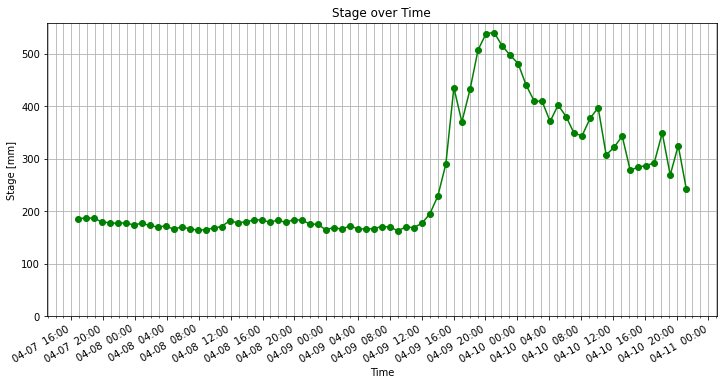

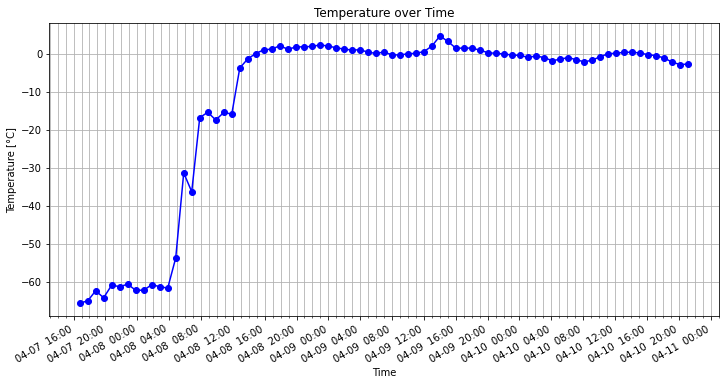

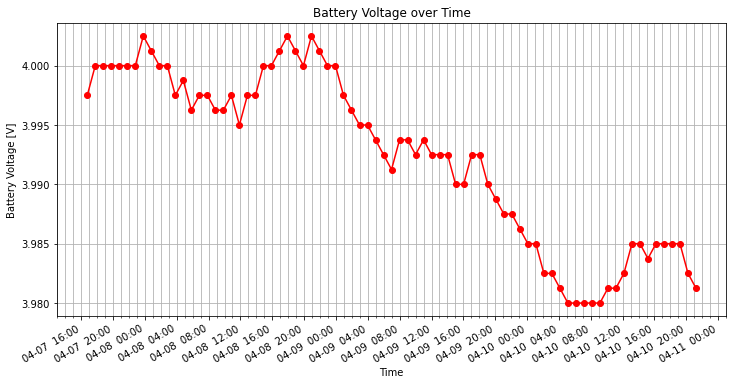

In [12]:
plot(dates, stages, 'go-', "Time", "Stage [mm]", "Stage over Time", force_yzero=True)
plot(dates, temps, 'bo-', "Time", "Temperature [°C]", "Temperature over Time")
plot(dates, batts, 'ro-', "Time", "Battery Voltage [V]", "Battery Voltage over Time")